In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics import regressionplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import graphics


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is E4C2-09B2

 Directory of C:\Users\AKASH KARMAKAR\data science\excelr tuts\Excelr assignment code files\multi linear regression 5

02-03-2022  16:51    <DIR>          .
20-02-2022  02:40    <DIR>          ..
01-03-2022  01:05    <DIR>          .ipynb_checkpoints
01-03-2022  01:01           386,648 50 start ups solution.ipynb
20-02-2022  02:40             2,436 50_Startups.csv
20-02-2022  02:40               468 proble_statement(50_startups) (1).txt
20-02-2022  02:40             1,752 Toyota Corolla.txt
02-03-2022  16:51           653,696 Toyota corrola solution.ipynb
20-02-2022  02:40           224,041 ToyotaCorolla.csv
               6 File(s)      1,269,041 bytes
               3 Dir(s)  54,275,391,488 bytes free


In [22]:
car=pd.read_csv('ToyotaCorolla.csv', encoding='latin-1')
car


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [30]:
car.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
car1=car.iloc[:,[2,3,6,8,12,13,15,16,17]]
car1
#car.loc[:, ['Price']]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [32]:
car1=car1.rename({'Price':'price',
                 'Age_08_04':'age',
                 'KM':'km',
                 'Doors':'door',
                 'Gears':'gear',
                 'QT':'qt',
                 'Weight':'weight',
                'HP':'hp',
                 'Quarterly_Tax':'qt'}, axis=1)
car1

,price,age,km,hp,cc,door,gear,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [33]:
car1.corr()

,price,age,km,hp,cc,door,gear,qt,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
door,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gear,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


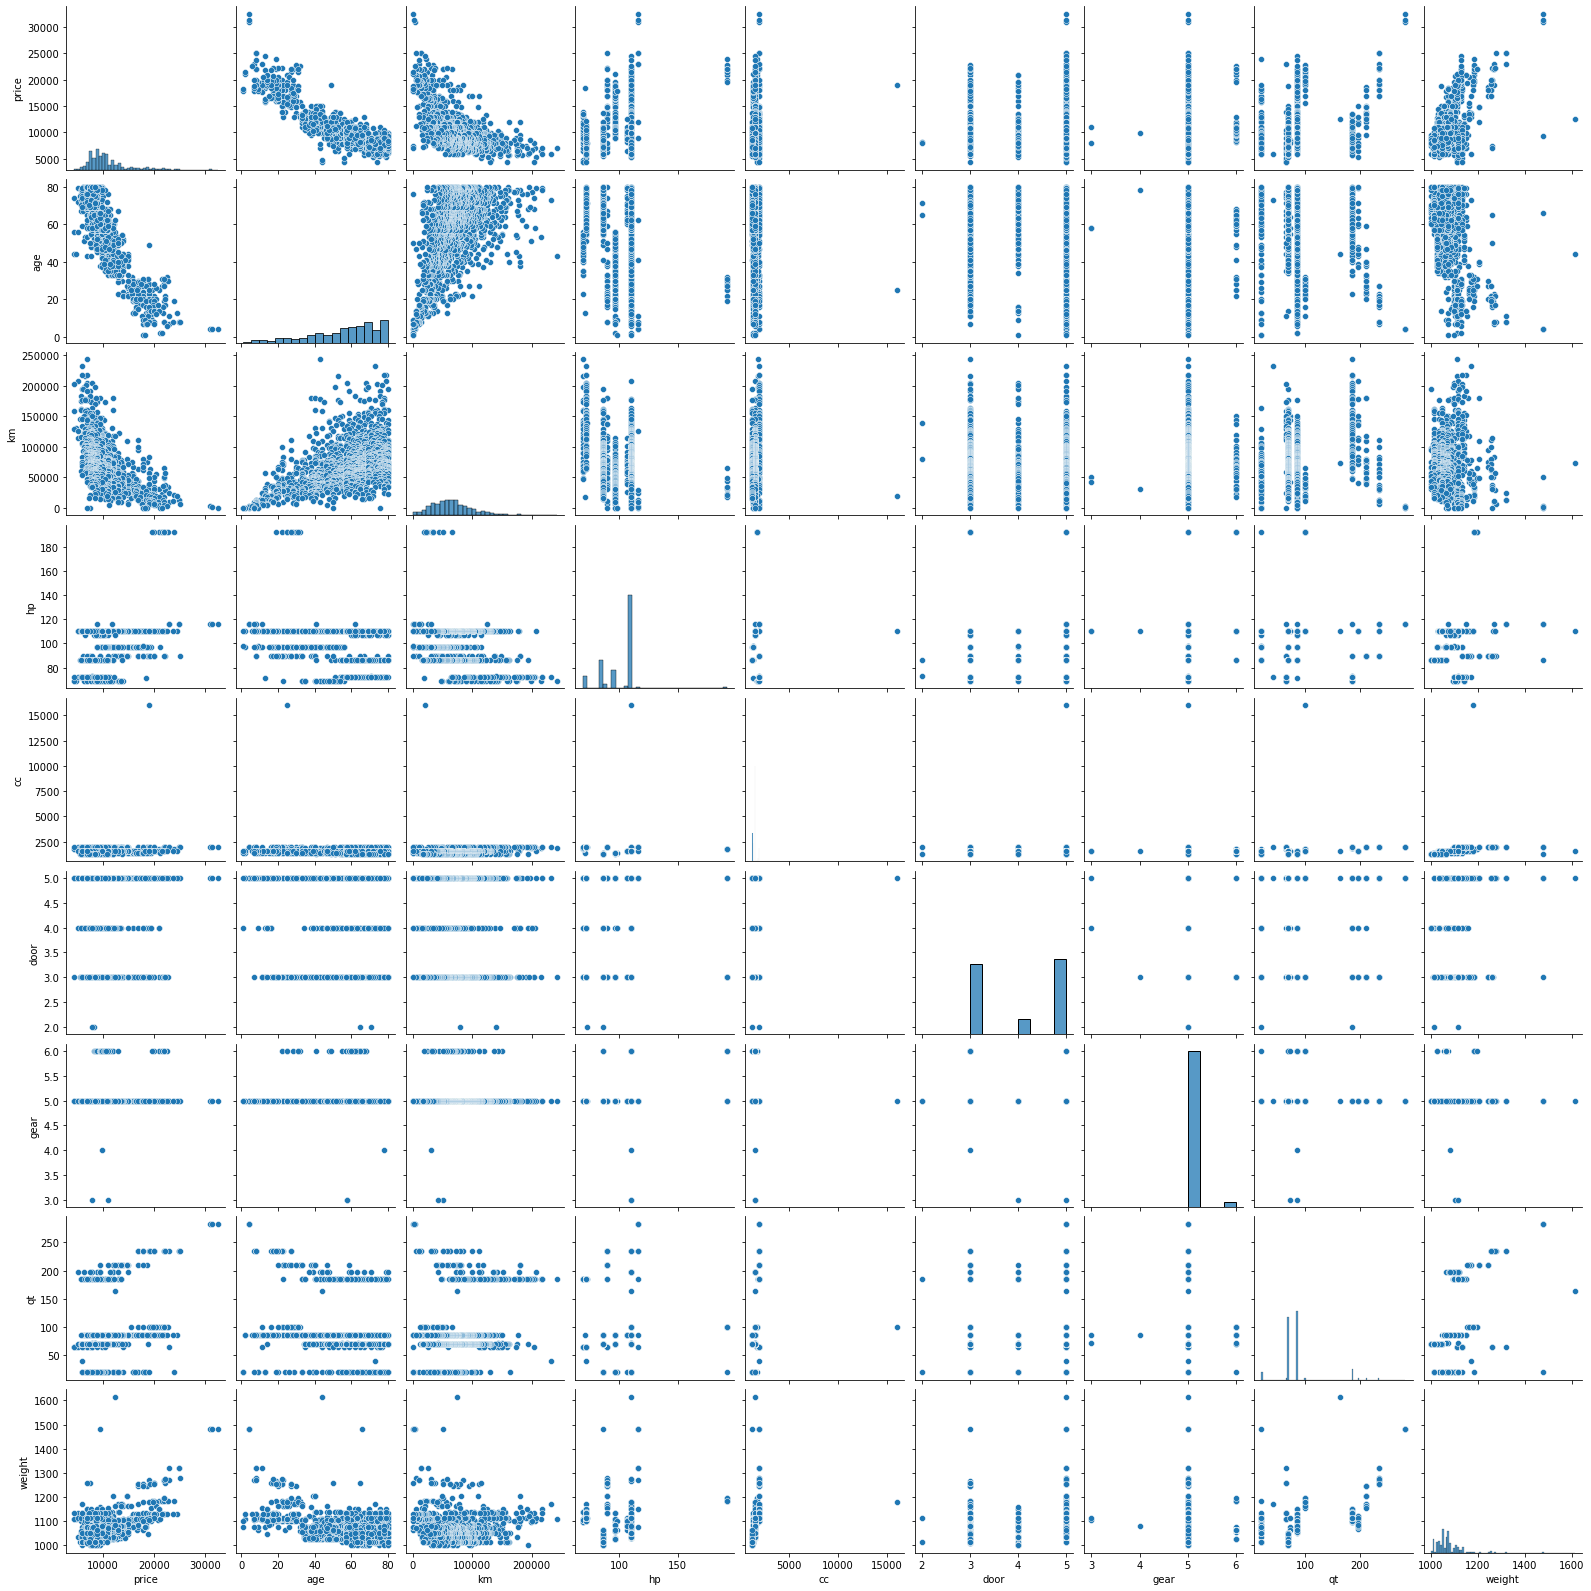

In [9]:
sns.pairplot(car1)

In [10]:
#model building
model=smf.ols('price~age+km+hp+cc+door+gear+qt+weight',data=car1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:51:21   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
door          -1.6166     40.006     -0.040      0.968     -80.093      76.859
gear         594.3199    197.055      3.016      0.003     207.771     980.869
qt             3.9491      1.310      3.015      0.003       1.379       6.519
weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### we can see that the door and cc parametres are insignificant to price variable

#### we will check each door and cc individually with price

In [11]:
model_door=smf.ols('price~door', data=car1).fit()
model_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.46e-12
Time:                        16:51:21   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
door         705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='door', ylabel='price'>

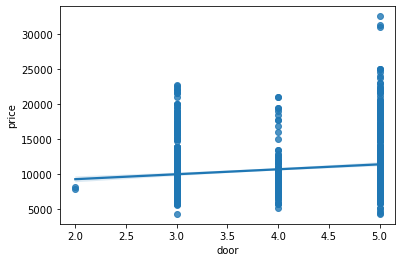

In [12]:
sns.regplot(x='door', y='price', data=car1)

#### here we can see that the door parameter is signifinat to the price

In [13]:
model_cc=smf.ols('price~cc',data=car1).fit()
model_cc.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.55e-06
Time:                        16:51:21   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### here also we can see that the cc is significant to the price

In [14]:
model_dc=smf.ols('price~door+cc',data=car1).fit()
model_dc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.15e-15
Time:                        16:51:21   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
door         671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### both cc and door are significant with the price together but the r sq values are very low.
Lets try the model without those parameters


In [15]:
model2=smf.ols('price~age+km+hp+gear+qt+weight', data=car1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:51:21   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
age         -121.6999      2.615    -46.534      0.000    -126.830    -116.570
km            -0.0209      0.001    -16.769      0.000      -0.023      -0.018
hp            31.3269      2.799     11.191      0.000      25.836      36.818
gear         598.9653    193.441      3.096      0.002     219.507     978.424
qt             3.7371      1.296      2.883      0.004       1.194       6.280
weight        16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### as we have the same r sq value after removing those parameters so  we can finally remove those two 

In [34]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   km      1436 non-null   int64
 3   hp      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   door    1436 non-null   int64
 6   gear    1436 non-null   int64
 7   qt      1436 non-null   int64
 8   weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [64]:
# insignificant parametes as the doors and the cc columns are removed from the car1 dataset
car1.drop(['door'], axis=1, inplace=True)

KeyError: "['door'] not found in axis"

In [63]:
car1

,price,age,km,hp,gear,qt,weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,5,69,1025
1432,10845,72,19000,86,5,69,1015
1433,8500,71,17016,86,5,69,1015
1434,7250,70,16916,86,5,69,1015


In [65]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:35:53   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
age         -121.6999      2.615    -46.534      0.000    -126.830    -116.570
km            -0.0209      0.001    -16.769      0.000      -0.023      -0.018
hp            31.3269      2.799     11.191      0.000      25.836      36.818
gear         598.9653    193.441      3.096      0.002     219.507     978.424
qt             3.7371      1.296      2.883      0.004       1.194       6.280
weight        16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## check for the residuals

C:\anaconda-python\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<function matplotlib.pyplot.show(close=None, block=None)>

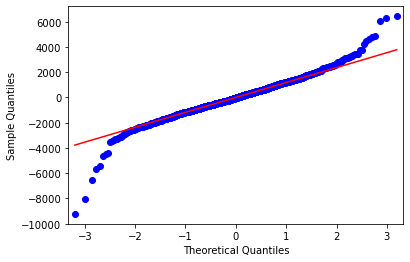

In [68]:
import statsmodels.api as sm
sm.qqplot(model2.resid, line='q')
plt.show

## check residual plot for homoscadasticity

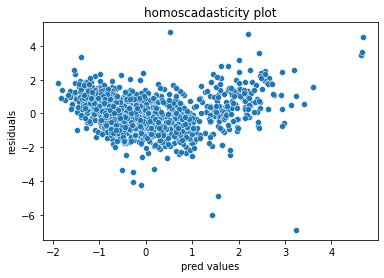

In [76]:
def get_std_val(val):
    val=(val-val.mean())/val.std()
    return val
    
sns.scatterplot(get_std_val(model2.fittedvalues), get_std_val(model2.resid))
plt.xlabel('pred values')
plt.ylabel('residuals')
plt.title('homoscadasticity plot')
plt.show()

### check for the residual regression plot 
for price parameter

<function matplotlib.pyplot.show(close=None, block=None)>

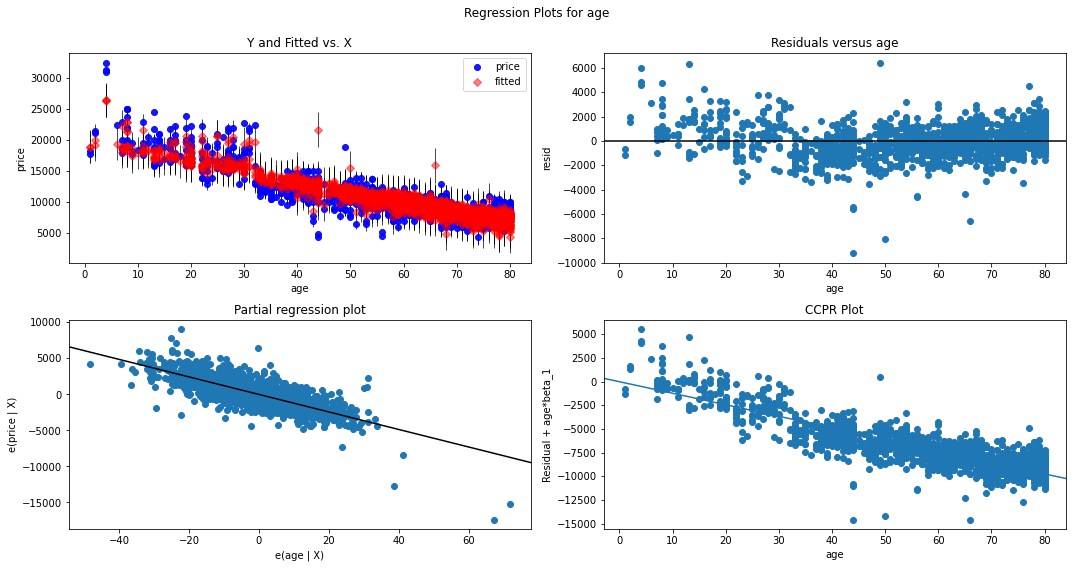

In [82]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model2, 'age', fig=fig)
plt.show

##### for km parameter

<function matplotlib.pyplot.show(close=None, block=None)>

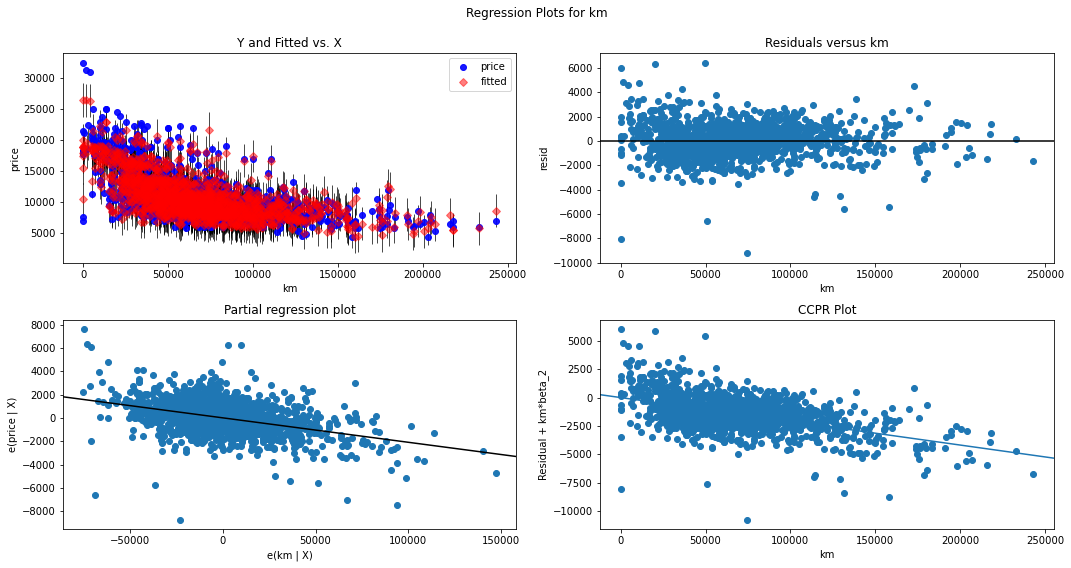

In [86]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model2, 'km', fig=fig)
plt.show

#### for hp parameter

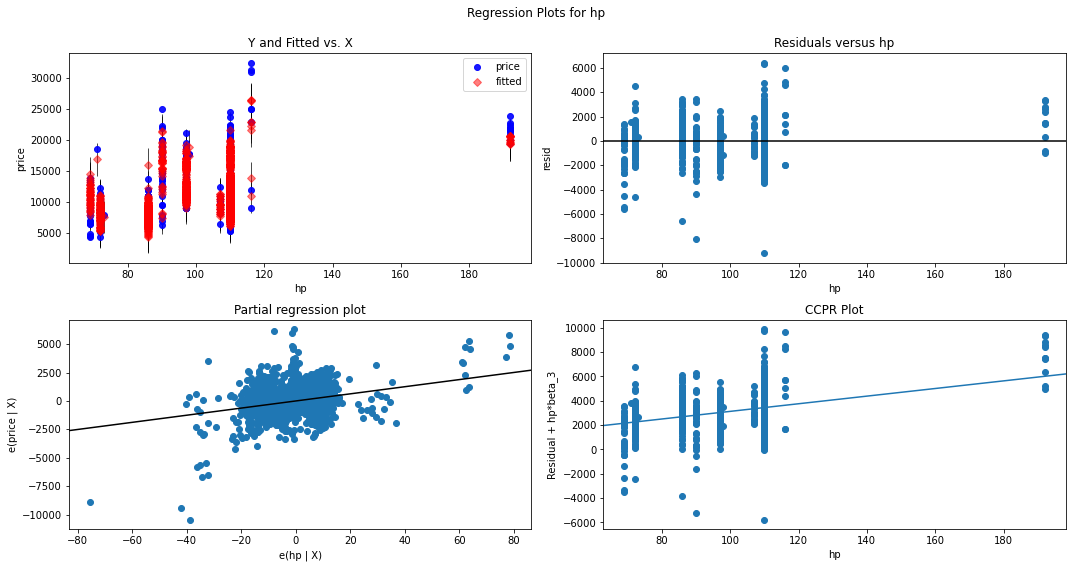

In [88]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model2, 'hp', fig=fig)
plt.show()

#### for gears parameter

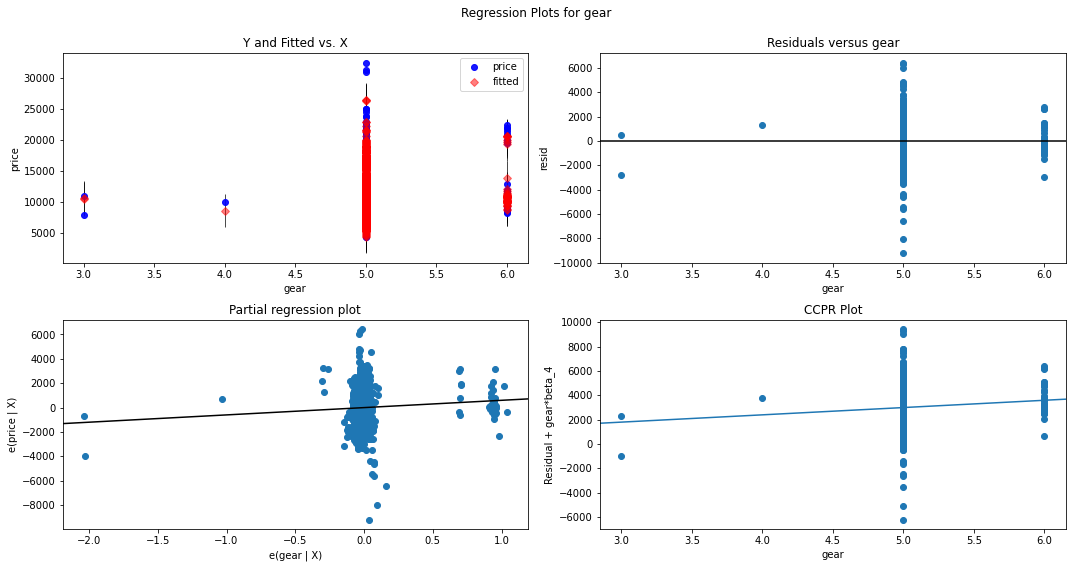

In [89]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model2, 'gear', fig=fig)
plt.show()

#### for quarterly tax parameter

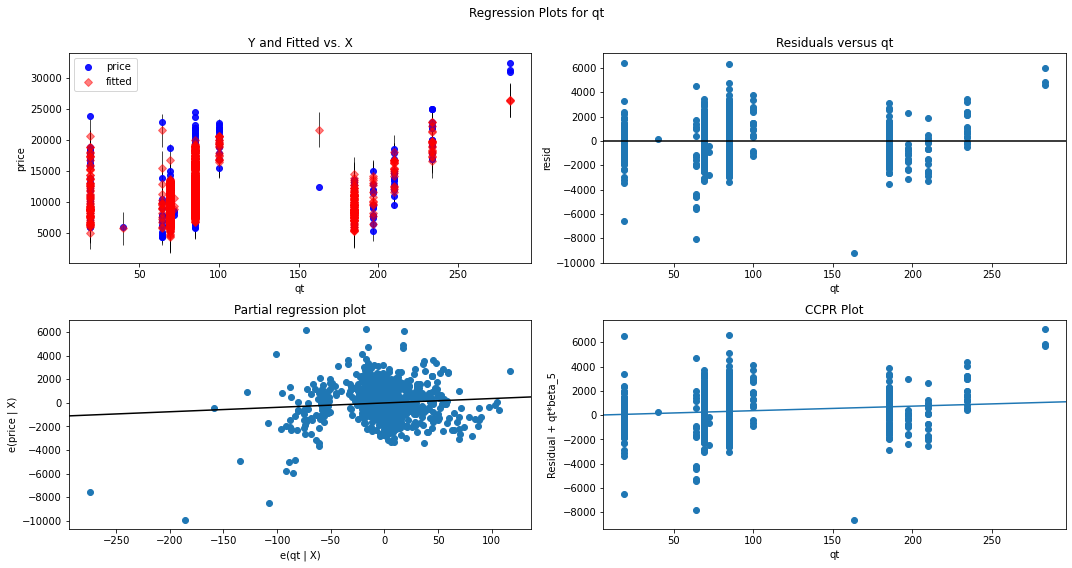

In [90]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model2,'qt', fig=fig)
plt.show()


#### for the weight parameter

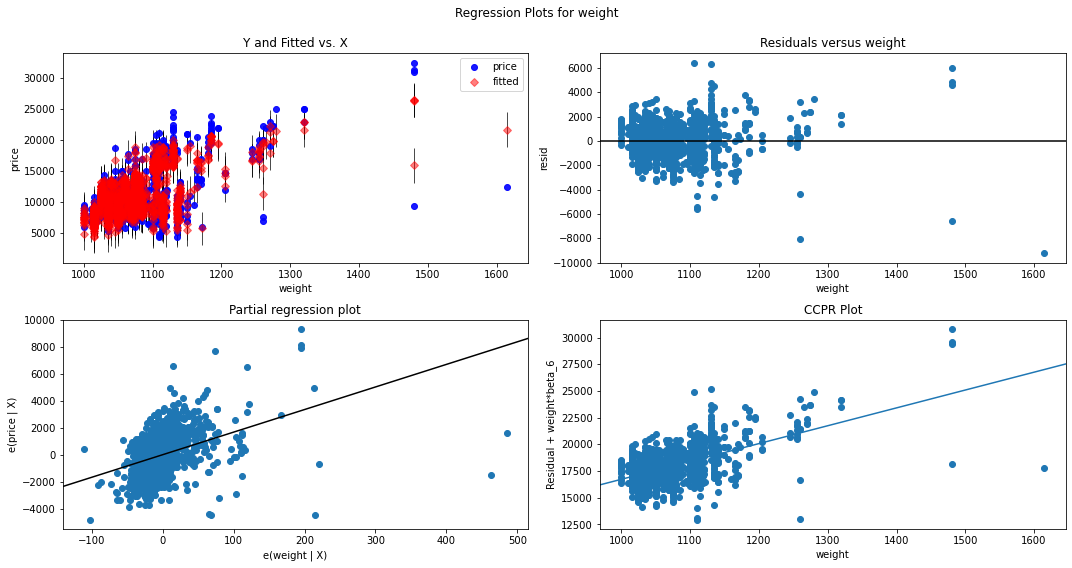

In [91]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model2, 'weight', fig=fig)
plt.show()

## check for the hook's distance using stem plot

In [96]:
model_influence= model2.get_influence()
(c,_)= model_influence.cooks_distance

<StemContainer object of 3 artists>

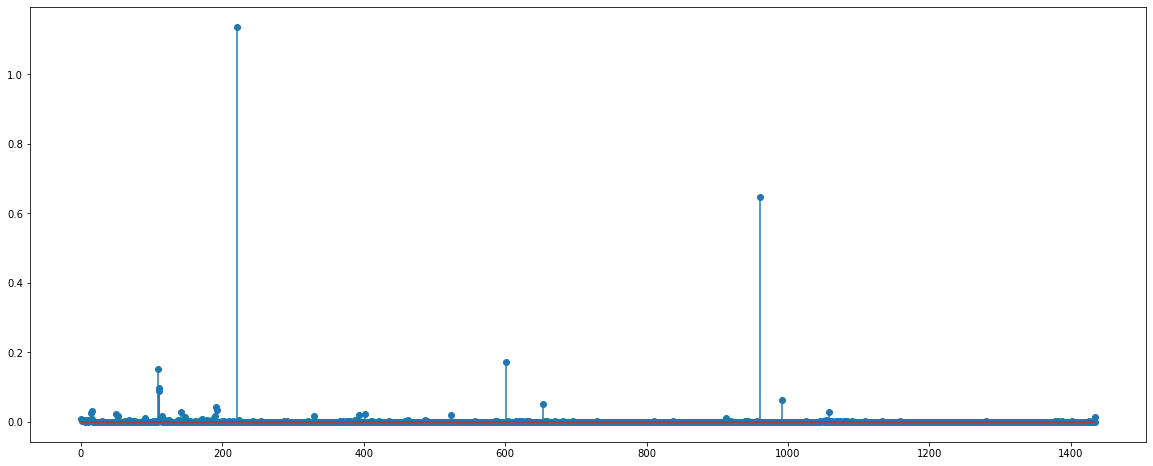

In [97]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(car1)), np.round(c,3))

In [98]:
# to check where the influencial values are
np.argmax(c)

221

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1080 with 0 Axes>

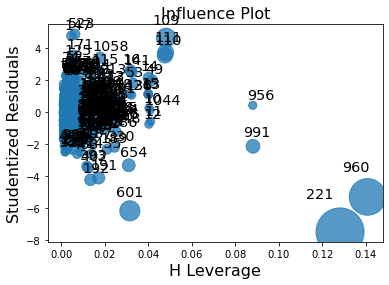

In [103]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize=(20,15))
influence_plot(model2)

plt.show

In [105]:
# we can remove the 221st row 
car2= car1.drop([221], axis=0).reset_index()
car2

,index,price,age,km,hp,gear,qt,weight
0,0,13500,23,46986,90,5,210,1165
1,1,13750,23,72937,90,5,210,1165
2,2,13950,24,41711,90,5,210,1165
3,3,14950,26,48000,90,5,210,1165
4,4,13750,30,38500,90,5,210,1170
...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,5,69,1025
1431,1432,10845,72,19000,86,5,69,1015
1432,1433,8500,71,17016,86,5,69,1015
1433,1434,7250,70,16916,86,5,69,1015


## rebuilding the model

In [108]:
model3=smf.ols('price~age+km+hp+gear+qt+weight', data=car2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1575.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:31:41   Log-Likelihood:                -12341.
No. Observations:                1435   AIC:                         2.470e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8341.5880   1433.844     -5.818      0.000   -1.12e+04   -5528.922
age         -119.0012      2.591    -45.925      0.000    -124.084    -113.918
km            -0.0212      0.001    -17.259      0.000      -0.024      -0.019
hp            29.5366      2.757     10.713      0.000      24.128      34.945
gear         606.8629    189.809      3.197      0.001     234.528     979.198
qt             1.9008      1.295      1.467      0.142      -0.640       4.442
weight        19.5561      1.070     18.279      0.000      17.457      21.655
==============================================================================
Omnibus:                      130.086   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.019
Skew:                          -0.196   Prob(JB):                    2.71e-157
Kurtosis:                       6.450   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model_influence= model3.get_influence()
(c,_)= model_influence.cooks_distance

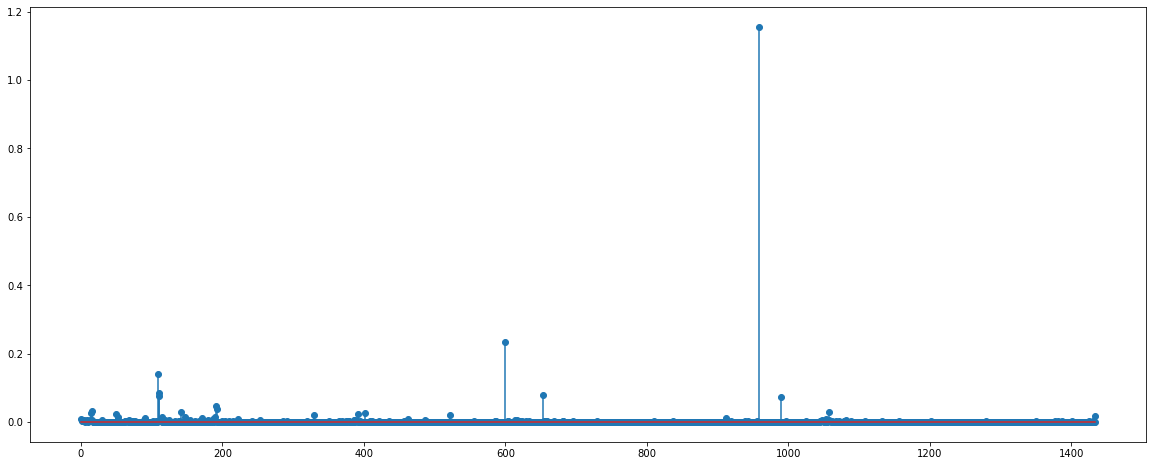

In [110]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(car2)), np.round(c,3))
plt.show()

In [114]:
np.argmax(c)

959

In [115]:
car3=car2.drop([959], axis=0)

In [116]:
model4=smf.ols('price~age+km+hp+gear+qt+weight', data=car3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1630.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:35:20   Log-Likelihood:                -12311.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1427   BIC:                         2.467e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.128e+04   1480.695     -7.620      0.000   -1.42e+04   -8378.474
age         -116.0961      2.590    -44.818      0.000    -121.177    -111.015
km            -0.0215      0.001    -17.772      0.000      -0.024      -0.019
hp            26.2236      2.762      9.495      0.000      20.806      31.641
gear         638.5439    187.075      3.413      0.001     271.572    1005.516
qt            -0.7390      1.337     -0.553      0.581      -3.361       1.883
weight        22.5545      1.147     19.664      0.000      20.305      24.804
==============================================================================
Omnibus:                      129.871   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.486
Skew:                          -0.215   Prob(JB):                    3.49e-152
Kurtosis:                       6.389   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
#model detection final model
while model.rsquared < 0.95:
    for c in [np.max(c)>0.5]:
        model=smf.ols('price~age+km+hp+gear+qt+weight',data=car3).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        car3=car3.drop(car3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        car3
    else:
        final_model=smf.ols('price~age+km+hp+gear+qt+weight',data=car3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

In [124]:
final_model.rsquared

0.9504293210729441

## data prediction

In [129]:

final_model.predict(car3)


0      15672.184337
1      15553.944462
2      15156.884065
3      15492.522247
4      15105.956798
           ...     
738     8056.536892
739     9274.710397
740     8254.735592
741     8863.713732
742     8455.761343
Length: 743, dtype: float64